<a href="https://colab.research.google.com/github/sgr1118/GD-NLP/blob/main/%5BGD_04%5D_news_category_Multiclass_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4-9. 프로젝트: Vocabulary Size를 변경해서 시도해보기

단어의 수를 어떻게 결정하느냐에 따라서 성능에 영향을 주는지 알아보도록 하자.

사용할 ML모델
- 나이브 베이즈 분류기, CNB, 로지스틱 회귀, 서포트 벡터 머신, 결정 트리, 랜덤 포레스트, 그래디언트 부스팅 트리, 보팅

사용할 deepL모델
- LSTM

1. 모든 단어 사용

2. 상위 5000단어 사용

3. 직접 단어 개수를 설정해서 사용

4. 1 ~ 3에서 최적의 모델과 단어 수 조건에서 내가 선택한 RNN모델을 적용하여 비교해보기



# 1. 데이터 불러오기

In [ ]:
# 데이터 및 라이브러리 불러오기

from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# vecotrize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# ML모델
from sklearn.naive_bayes import MultinomialNB # 다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score # 정확도 계산
from sklearn.metrics import f1_score # f1-score 계산

# matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings(action='ignore')

2-1. 모든 단어를 사용한 경우

In [ ]:
# 데이터 불러오기

(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)

# num_words =  None으로 설정하여 모든 단어를 사용한다.

2121728/2110848 [==============================] - 0s 0us/step


In [ ]:
print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


In [ ]:
# 맵핑된 정수 출력하기

print(x_train[0])
print(x_test[0])
print(y_train[0])
print(y_test[0])

[1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
[1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 18292, 159, 9, 1084, 363, 13, 19231, 71, 9, 16273, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 16273, 7, 748, 48, 9, 19231, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56, 23406, 28185, 5, 192,

In [ ]:
# 클래스의 수 확인

num_classes = max(y_train) + 1
print('클래스의 수 : {}'.format(num_classes))

클래스의 수 : 46


데이터 분포 확인하기

훈련용 뉴스의 최대 길이 : 2376
훈련용 뉴스의 평군 길이 : 145.5398574927633


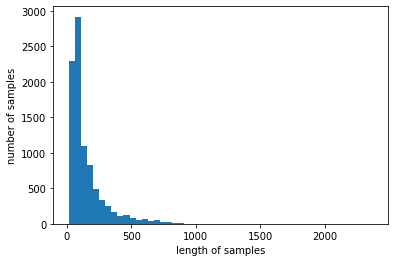

In [ ]:
print('훈련용 뉴스의 최대 길이 : {}'.format(max(len(l) for l in x_train)))
print('훈련용 뉴스의 평군 길이 : {}'.format(sum(map(len, x_train)) / len(x_train)))

plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

# 최대 길이에 비하여 평균길이는 많이 짧다.
# 클래스의 분포도 확인해봐야겠다.
# num_words 수를 바꿔도 이 분포는 변하지않으면

In [ ]:
# 각 클래수 빈도 수 확인하기

unique_elements, counts_elements = np.unique(y_train, return_counts = True)
print("각 클래스 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

각 클래스 빈도수:
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]


# 2. 뉴스 데이터 복원하기 (정수 > 텍스트)

로이터 뉴스 데이터는 '단어'를 key값으로, 고유한 '정수'를 value로 가지는 dictionary를 제공합니다. 이를 word_index로 저장해보겠습니다.

In [ ]:
word_index = reuters.get_word_index(path='reuters_word_index.json')

565248/550378 [==============================] - 0s 0us/step


In [ ]:
# 단어와 정수 맵핑 확인해보기
print(word_index['the'], word_index['it'])

1 13


사실 the는 1번이 아니라 4번 단어이다. 다른 단어들도 만찬가지로 word_index에 입력으로 했을 때, 얻는 숫자보다는 +3을 한 숫자가 고유 숫자이다. 이런 이유는 로이터 뉴스데이터가 정의한 일종의 약속이다.

In [ ]:
# word_index + 3 적용

index_to_word = {index+3 : word for word, index in word_index.items()}

In [ ]:
print(index_to_word[4])
print(index_to_word[16])

the
it


0번, 1번, 2번은 사실 각각 <pad>, <sos>, <unk>라는 자연어 처리를 위한 특별한 토큰들을 위해 맵핑된 번호입니다. 그래서 만들어진 index_to_word에 추가적으로 이 작업을 해주어야 진짜 index_to_word가 완성됩니다.

In [ ]:
# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token

In [ ]:
# 뉴스 기사 텍스트 복원

print(' '.join([index_to_word[index] for index in x_train[0]]))

<sos> mcgrath rentcorp said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


데이터를 불러오기 할 때 num_words = None으로 설정하였기 때문에 정수 번호가 어떻든 <UNK>는 출력되지 않을 것이다.

실제로 그러한지 확인해 보자

In [ ]:
# 훈련용 뉴스 데이터 정수 > 텍스트 데이터 변환

decoded = []
for i in range(len(x_train)):
  t = ' '.join([index_to_word[index] for index in x_train[i]])
  decoded.append(t)

x_train = decoded
print(len(x_train))

8982


In [ ]:
# 테스트용 뉴스 데이터 정수 > 텍스트 데이터 변환

decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded
print(len(x_test))

2246


In [ ]:
# element in List를 사용하여 <unk>가 있는지 확인해보기
print('<unk>' in x_train, '<unk>' in x_test)

False False


In [ ]:
# 일정 문자 출력해보기

print(x_train[0])
print(x_test[0])

<sos> mcgrath rentcorp said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3
<sos> the great atlantic and pacific tea co said its three year 345 mln dlr capital program will be be substantially increased to accommodate growth and expansion plans for waldbaum inc and shopwell inc over the next two years a and p said the acquisition of shopwell in august 1986 and waldbaum in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations jumped 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the exp

# 3. 벡터화하기

사용하는 벡터화
- CountVectorizer
- TfidfTransformer

이번 과정에서는 신경망이 아닌 머신러닝 모델을 사용하므로 BOG 가설을 기반으로하는 DTM, TF-IDF를 사용한다.

In [ ]:
# DTM 생성
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 26506)


In [ ]:
# TF-IDF 벡터화
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 26506)


In [ ]:
# 정확한 정확도 측정을 위하여 테스트 데이터도 TF-IDF 행렬로 변환해야한다.

x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

# 4. 8가지 머신러닝 모델 구현하기

- 8가지 머신러닝을 전부 구동할 수 있는 함수를 작성하고 각 모델에 대한 f1-score를 출력한다.

- 한번 학습할 때 긴 시간이 걸릴것으로 예측이됨.

- 사용하는 ML 모델 : 나이브 베이즈 분류기, CNB, 로지스틱 회귀, 서포트 벡터 머신, 결정 트리, 랜덤 포레스트, 그래디언트 부스팅 트리, 보팅

[f1-score 오류 해결](https://aimb.tistory.com/152)

In [ ]:
# 모델 score 출력 함수

def get_score(model, tfidfv, y_train, tfidfv_test, y_test):
  A = model.score(tfidfv, y_train)
  pred = model.predict(tfidfv)
  B = f1_score(y_train, pred, average='weighted')
  predicted = model.predict(tfidfv_test)
  C = model.score(tfidfv_test, y_test)
  D = f1_score(y_test, predicted, average='weighted') # 예측값과 실제값 비교 (f1-score)
  # average = None 매개변수가 다중 클래스인 경우 지정
  return 'train_acc : {:.4f}, train_f1 : {:.4f}, test_acc : {:.4f}, test_f1 : {:.4f}'.format(A, B, C, D)

In [ ]:
# 머신러닝 모델 함수

def make_model(tfidfv, y_train, tfidfv_test, y_test):
  # 나이브 베이즈 분류기
  NB = MultinomialNB().fit(tfidfv, y_train)
  print('NB', get_score(NB, tfidfv, y_train, tfidfv_test, y_test))

  # 컴플리먼트 나이브 베이즈 분류기
  CB = ComplementNB().fit(tfidfv, y_train)
  print('CB', get_score(CB, tfidfv, y_train, tfidfv_test, y_test))

  # 로지스틱 회귀
  lr = LogisticRegression(C=10000, penalty='l2', max_iter=3000).fit(tfidfv, y_train)
  print('lr', get_score(lr, tfidfv, y_train, tfidfv_test, y_test))

  # 선형 서포트 벡터 머신
  lsvc = LinearSVC(C=1000, penalty='l1', max_iter=3000, dual=False).fit(tfidfv, y_train)
  print('lsvc', get_score(lsvc, tfidfv, y_train, tfidfv_test, y_test))

  # 결정 트리
  tree = DecisionTreeClassifier(max_depth=10, random_state=0).fit(tfidfv, y_train)
  print('tree', get_score(tree, tfidfv, y_train, tfidfv_test, y_test))

  # 랜덤 포레스트
  forest = RandomForestClassifier(n_estimators=5, random_state=0).fit(tfidfv, y_train)
  print('forest', get_score(forest, tfidfv, y_train, tfidfv_test, y_test))

  # 그레디언트 부스트 트리
  grbt = GradientBoostingClassifier(random_state=0).fit(tfidfv, y_train)
  print('grbt', get_score(grbt, tfidfv, y_train, tfidfv_test, y_test))

  # 보팅
  voting_classifier = VotingClassifier(estimators=[
      ('lr', LogisticRegression(C=10000, max_iter=3000, penalty='l2')),
      ('cb', ComplementNB()),
      ('grbt', GradientBoostingClassifier(random_state=0))], voting='soft').fit(tfidfv, y_train)
  print('voting_classifier', get_score(voting_classifier, tfidfv, y_train, tfidfv_test, y_test))

In [ ]:
make_model(tfidfv, y_train, tfidfv_test, y_test)

NB  train_acc : 0.6346, train_f1 : 0.5460, test_acc : 0.5997, test_f1 : 0.5046
CB  train_acc : 0.8403, train_f1 : 0.8264, test_acc : 0.7649, test_f1 : 0.7347
lr train_acc : 0.9684, train_f1 : 0.9683, test_acc : 0.8170, test_f1 : 0.8119
lsvc train_acc : 0.9684, train_f1 : 0.9683, test_acc : 0.7916, test_f1 : 0.7880
tree train_acc : 0.6807, train_f1 : 0.6434, test_acc : 0.6211, test_f1 : 0.5769
forest train_acc : 0.9423, train_f1 : 0.9419, test_acc : 0.6545, test_f1 : 0.6226
grbt train_acc : 0.9482, train_f1 : 0.9480, test_acc : 0.7703, test_f1 : 0.7642
voting_classifier train_acc : 0.9670, train_f1 : 0.9669, test_acc : 0.8157, test_f1 : 0.8118


2-2. 빈도수 상위 5,000개의 단어만 사용

2-1에서 초반에 진행한 (1) 레이블 출력, (2) 클래스의 수 확인, (3) 분포 확인은 넘어가도록 한다. 왜냐하면 num_words를 바꿔도 이 내용들은 변하지 않기 때문이다.

In [ ]:
# 데이터 불러오기

(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=5000, test_split=0.2)

# num_words = 5000으로 설정하여 5000개 사용한다.

In [ ]:
print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


# 2. 뉴스 데이터 복원하기 (정수 > 텍스트)

로이터 뉴스 데이터는 '단어'를 key값으로, 고유한 '정수'를 value로 가지는 dictionary를 제공합니다. 이를 word_index로 저장해보겠습니다.

In [ ]:
word_index = reuters.get_word_index(path='reuters_word_index.json')

In [ ]:
# 단어와 정수 맵핑 확인해보기
print(word_index['the'], word_index['it'])

1 13


사실 the는 1번이 아니라 4번 단어이다. 다른 단어들도 만찬가지로 word_index에 입력으로 했을 때, 얻는 숫자보다는 +3을 한 숫자가 고유 숫자이다. 이런 이유는 로이터 뉴스데이터가 정의한 일종의 약속이다.

In [ ]:
# word_index + 3 적용

index_to_word = {index+3 : word for word, index in word_index.items()}

In [ ]:
print(index_to_word[4])
print(index_to_word[16])

the
it


0번, 1번, 2번은 사실 각각 <pad>, <sos>, <unk>라는 자연어 처리를 위한 특별한 토큰들을 위해 맵핑된 번호입니다. 그래서 만들어진 index_to_word에 추가적으로 이 작업을 해주어야 진짜 index_to_word가 완성됩니다.

In [ ]:
# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token

In [ ]:
# 뉴스 기사 텍스트 복원

print(' '.join([index_to_word[index] for index in x_train[0]]))

<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [ ]:
# 훈련용 뉴스 데이터 정수 > 텍스트 데이터 변환

decoded = []
for i in range(len(x_train)):
  t = ' '.join([index_to_word[index] for index in x_train[i]])
  decoded.append(t)

x_train = decoded
print(len(x_train))

8982


In [ ]:
# 테스트용 뉴스 데이터 정수 > 텍스트 데이터 변환

decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded
print(len(x_test))

2246


In [ ]:
# 일정 문자 출력해보기

print(x_train[0])
print(x_test[0])

<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3
<sos> the great atlantic and pacific tea co said its three year 345 mln dlr capital program will be be substantially increased to <unk> growth and expansion plans for <unk> inc and <unk> inc over the next two years a and p said the acquisition of <unk> in august 1986 and <unk> in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations jumped 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the expanded capital program b

# 3. 벡터화하기

사용하는 벡터화
- CountVectorizer
- TfidfTransformer

이번 과정에서는 신경망이 아닌 머신러닝 모델을 사용하므로 BOG 가설을 기반으로하는 DTM, TF-IDF를 사용한다.

In [ ]:
# DTM 생성
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 4867)


In [ ]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 4867)


In [ ]:
# 정확한 정확도 측정을 위하여 테스트 데이터도 TF-IDF 행렬로 변환해야한다.

x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

# 4. 8가지 머신러닝 모델 구현하기

- 8가지 머신러닝을 전부 구동할 수 있는 함수를 작성하고 각 모델에 대한 f1-score를 출력한다.

- 한번 학습할 때 긴 시간이 걸릴것으로 예측이됨.

- 사용하는 ML 모델 : 나이브 베이즈 분류기, CNB, 로지스틱 회귀, 서포트 벡터 머신, 결정 트리, 랜덤 포레스트, 그래디언트 부스팅 트리, 보팅

In [ ]:
# 모델 score 출력 함수

def get_score(model, tfidfv, y_train, tfidfv_test, y_test):
  A = model.score(tfidfv, y_train)
  pred = model.predict(tfidfv)
  B = f1_score(y_train, pred, average='weighted')
  predicted = model.predict(tfidfv_test)
  C = model.score(tfidfv_test, y_test)
  D = f1_score(y_test, predicted, average='weighted') # 예측값과 실제값 비교 (f1-score)
  # average = None 매개변수가 다중 클래스인 경우 지정
  return 'train_acc : {:.4f}, train_f1 : {:.4f}, test_acc : {:.4f}, test_f1 : {:.4f}'.format(A, B, C, D)

In [ ]:
# 머신러닝 모델 함수

def make_model(tfidfv, y_train, tfidfv_test, y_test):
  # 나이브 베이즈 분류기
  NB = MultinomialNB().fit(tfidfv, y_train)
  print('NB', get_score(NB, tfidfv, y_train, tfidfv_test, y_test))

  # 컴플리먼트 나이브 베이즈 분류기
  CB = ComplementNB().fit(tfidfv, y_train)
  print('CB', get_score(CB, tfidfv, y_train, tfidfv_test, y_test))

  # 로지스틱 회귀
  lr = LogisticRegression(C=10000, penalty='l2', max_iter=3000).fit(tfidfv, y_train)
  print('lr', get_score(lr, tfidfv, y_train, tfidfv_test, y_test))

  # 선형 서포트 벡터 머신
  lsvc = LinearSVC(C=1000, penalty='l1', max_iter=3000, dual=False).fit(tfidfv, y_train)
  print('lsvc', get_score(lsvc, tfidfv, y_train, tfidfv_test, y_test))

  # 결정 트리
  tree = DecisionTreeClassifier(max_depth=10, random_state=0).fit(tfidfv, y_train)
  print('tree', get_score(tree, tfidfv, y_train, tfidfv_test, y_test))

  # 랜덤 포레스트
  forest = RandomForestClassifier(n_estimators=5, random_state=0).fit(tfidfv, y_train)
  print('forest', get_score(forest, tfidfv, y_train, tfidfv_test, y_test))

  # 그레디언트 부스트 트리
  grbt = GradientBoostingClassifier(random_state=0).fit(tfidfv, y_train)
  print('grbt', get_score(grbt, tfidfv, y_train, tfidfv_test, y_test))

  # 보팅
  voting_classifier = VotingClassifier(estimators=[
      ('lr', LogisticRegression(C=10000, max_iter=3000, penalty='l2')),
      ('cb', ComplementNB()),
      ('grbt', GradientBoostingClassifier(random_state=0))], voting='soft').fit(tfidfv, y_train)
  print('voting_classifier', get_score(voting_classifier, tfidfv, y_train, tfidfv_test, y_test))

In [ ]:
make_model(tfidfv, y_train, tfidfv_test, y_test)

NB  train_acc : 0.7011, train_f1 : 0.6360, test_acc : 0.6732, test_f1 : 0.6013
CB  train_acc : 0.8111, train_f1 : 0.7960, test_acc : 0.7707, test_f1 : 0.7459
lr train_acc : 0.9684, train_f1 : 0.9683, test_acc : 0.8037, test_f1 : 0.7985
lsvc train_acc : 0.9684, train_f1 : 0.9683, test_acc : 0.7703, test_f1 : 0.7667
tree train_acc : 0.6774, train_f1 : 0.6396, test_acc : 0.6180, test_f1 : 0.5730
forest train_acc : 0.9453, train_f1 : 0.9450, test_acc : 0.7012, test_f1 : 0.6770
grbt train_acc : 0.9410, train_f1 : 0.9409, test_acc : 0.7676, test_f1 : 0.7662
voting_classifier train_acc : 0.9658, train_f1 : 0.9657, test_acc : 0.8103, test_f1 : 0.8076


2-3. 직접 단어 개수를 지정해보디

2-1에서 초반에 진행한 (1) 레이블 출력, (2) 클래스의 수 확인, (3) 분포 확인은 넘어가도록 한다. 왜냐하면 num_words를 바꿔도 이 내용들은 변하지 않기 때문이다.

기존에 모든 단어를 사용할 때 만든 DTM에서 (8982, 26506)이었으므로 num_words = 3000으로 결정하였다.

In [ ]:
# 데이터 불러오기

(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=3000, test_split=0.2)

# num_words = 3000으로 설정하여 3000개 단어를 사용한다.

In [ ]:
print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


# 2. 뉴스 데이터 복원하기 (정수 > 텍스트)

로이터 뉴스 데이터는 '단어'를 key값으로, 고유한 '정수'를 value로 가지는 dictionary를 제공합니다. 이를 word_index로 저장해보겠습니다.

In [ ]:
word_index = reuters.get_word_index(path='reuters_word_index.json')

In [ ]:
# 단어와 정수 맵핑 확인해보기
print(word_index['the'], word_index['it'])

1 13


사실 the는 1번이 아니라 4번 단어이다. 다른 단어들도 만찬가지로 word_index에 입력으로 했을 때, 얻는 숫자보다는 +3을 한 숫자가 고유 숫자이다. 이런 이유는 로이터 뉴스데이터가 정의한 일종의 약속이다.

In [ ]:
# word_index + 3 적용

index_to_word = {index+3 : word for word, index in word_index.items()}

In [ ]:
print(index_to_word[4])
print(index_to_word[16])

the
it


0번, 1번, 2번은 사실 각각 <pad>, <sos>, <unk>라는 자연어 처리를 위한 특별한 토큰들을 위해 맵핑된 번호입니다. 그래서 만들어진 index_to_word에 추가적으로 이 작업을 해주어야 진짜 index_to_word가 완성됩니다.

In [ ]:
# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token

In [ ]:
# 뉴스 기사 텍스트 복원

print(' '.join([index_to_word[index] for index in x_train[0]]))

<sos> <unk> <unk> said as a result of its december acquisition of <unk> co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and <unk> operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [ ]:
# 훈련용 뉴스 데이터 정수 > 텍스트 데이터 변환

decoded = []
for i in range(len(x_train)):
  t = ' '.join([index_to_word[index] for index in x_train[i]])
  decoded.append(t)

x_train = decoded
print(len(x_train))

8982


In [ ]:
# 테스트용 뉴스 데이터 정수 > 텍스트 데이터 변환

decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded
print(len(x_test))

2246


In [ ]:
# element in List를 사용하여 <unk>가 있는지 확인해보기
print('<unk>' in x_train, '<unk>' in x_test)

False False


In [ ]:
# 일정 문자 출력해보기

print(x_train[0])
print(x_test[0])

<sos> <unk> <unk> said as a result of its december acquisition of <unk> co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and <unk> operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3
<sos> the great atlantic and pacific <unk> co said its three year <unk> mln dlr capital program will be be substantially increased to <unk> growth and expansion plans for <unk> inc and <unk> inc over the next two years a and p said the acquisition of <unk> in august 1986 and <unk> in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations <unk> 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the expanded capital program

# 3. 벡터화하기

사용하는 벡터화
- CountVectorizer
- TfidfTransformer

이번 과정에서는 신경망이 아닌 머신러닝 모델을 사용하므로 BOG 가설을 기반으로하는 DTM, TF-IDF를 사용한다.

In [ ]:
# DTM 생성
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 2919)


In [ ]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 2919)


# 4. 8가지 머신러닝 모델 구현하기

- 8가지 머신러닝을 전부 구동할 수 있는 함수를 작성하고 각 모델에 대한 f1-score를 출력한다.

- 한번 학습할 때 긴 시간이 걸릴것으로 예측이됨.

- 사용하는 ML 모델 : 나이브 베이즈 분류기, CNB, 로지스틱 회귀, 서포트 벡터 머신, 결정 트리, 랜덤 포레스트, 그래디언트 부스팅 트리, 보팅

In [ ]:
# 정확한 정확도 측정을 위하여 테스트 데이터도 TF-IDF 행렬로 변환해야한다.

x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

In [ ]:
# 모델 score 출력 함수

def get_score(model, tfidfv, y_train, tfidfv_test, y_test):
  A = model.score(tfidfv, y_train)
  pred = model.predict(tfidfv)
  B = f1_score(y_train, pred, average='weighted')
  predicted = model.predict(tfidfv_test)
  C = model.score(tfidfv_test, y_test)
  D = f1_score(y_test, predicted, average='weighted') # 예측값과 실제값 비교 (f1-score)
  # average = None 매개변수가 다중 클래스인 경우 지정
  return 'train_acc : {:.4f}, train_f1 : {:.4f}, test_acc : {:.4f}, test_f1 : {:.4f}'.format(A, B, C, D)

In [ ]:
# 머신러닝 모델 함수

def make_model(tfidfv, y_train, tfidfv_test, y_test):
  # 나이브 베이즈 분류기
  NB = MultinomialNB().fit(tfidfv, y_train)
  print('NB', get_score(NB, tfidfv, y_train, tfidfv_test, y_test))

  # 컴플리먼트 나이브 베이즈 분류기
  CB = ComplementNB().fit(tfidfv, y_train)
  print('CB', get_score(CB, tfidfv, y_train, tfidfv_test, y_test))

  # 로지스틱 회귀
  lr = LogisticRegression(C=10000, penalty='l2', max_iter=3000).fit(tfidfv, y_train)
  print('lr', get_score(lr, tfidfv, y_train, tfidfv_test, y_test))

  # 선형 서포트 벡터 머신
  lsvc = LinearSVC(C=1000, penalty='l1', max_iter=3000, dual=False).fit(tfidfv, y_train)
  print('lsvc', get_score(lsvc, tfidfv, y_train, tfidfv_test, y_test))

  # 결정 트리
  tree = DecisionTreeClassifier(max_depth=10, random_state=0).fit(tfidfv, y_train)
  print('tree', get_score(tree, tfidfv, y_train, tfidfv_test, y_test))

  # 랜덤 포레스트
  forest = RandomForestClassifier(n_estimators=5, random_state=0).fit(tfidfv, y_train)
  print('forest', get_score(forest, tfidfv, y_train, tfidfv_test, y_test))

  # 그레디언트 부스트 트리
  grbt = GradientBoostingClassifier(random_state=0).fit(tfidfv, y_train)
  print('grbt', get_score(grbt, tfidfv, y_train, tfidfv_test, y_test))

  # 보팅
  voting_classifier = VotingClassifier(estimators=[
      ('lr', LogisticRegression(C=10000, max_iter=3000, penalty='l2')),
      ('cb', ComplementNB()),
      ('grbt', GradientBoostingClassifier(random_state=0))], voting='soft').fit(tfidfv, y_train)
  print('voting_classifier', get_score(voting_classifier, tfidfv, y_train, tfidfv_test, y_test))

In [ ]:
make_model(tfidfv, y_train, tfidfv_test, y_test)

NB  train_acc : 0.7154, train_f1 : 0.6617, test_acc : 0.6874, test_f1 : 0.6266
CB  train_acc : 0.8000, train_f1 : 0.7815, test_acc : 0.7645, test_f1 : 0.7370
lr train_acc : 0.9684, train_f1 : 0.9683, test_acc : 0.7881, test_f1 : 0.7837
lsvc train_acc : 0.9684, train_f1 : 0.9683, test_acc : 0.7529, test_f1 : 0.7510
tree train_acc : 0.6788, train_f1 : 0.6404, test_acc : 0.6260, test_f1 : 0.5800
forest train_acc : 0.9478, train_f1 : 0.9475, test_acc : 0.6857, test_f1 : 0.6592
grbt train_acc : 0.9403, train_f1 : 0.9401, test_acc : 0.7756, test_f1 : 0.7721
voting_classifier train_acc : 0.9662, train_f1 : 0.9661, test_acc : 0.8019, test_f1 : 0.7977


# 모든 단어 사용한 경우

- NB  train_acc : 0.6346, train_f1 : 0.5460, test_acc : 0.5997, test_f1 : 0.5046
- CB  train_acc : 0.8403, train_f1 : 0.8264, test_acc : 0.7649, test_f1 : 0.7347
- lr train_acc : 0.9684, train_f1 : 0.9683, test_acc : 0.8170, test_f1 : 0.8119
- lsvc train_acc : 0.9684, train_f1 : 0.9683, test_acc : 0.7916, test_f1 : 0.7880
- tree train_acc : 0.6807, train_f1 : 0.6434, test_acc : 0.6211, test_f1 : 0.5769
- forest train_acc : 0.9423, train_f1 : 0.9419, test_acc : 0.6545, test_f1 : 0.6226
- grbt train_acc : 0.9482, train_f1 : 0.9480, test_acc : 0.7703, test_f1 : 0.7642
- voting_classifier train_acc : 0.9670, train_f1 : 0.9669, test_acc : 0.8157, test_f1 : 0.8118

# 5000개 사용한 경우

- NB  train_acc : 0.7011, train_f1 : 0.6360, test_acc : 0.6732, test_f1 : 0.6013
- CB  train_acc : 0.8111, train_f1 : 0.7960, test_acc : 0.7707, test_f1 : 0.7459
- lr train_acc : 0.9684, train_f1 : 0.9683, test_acc : 0.8037, test_f1 : 0.7985
- lsvc train_acc : 0.9684, train_f1 : 0.9683, test_acc : 0.7703, test_f1 : 0.7667
- tree train_acc : 0.6774, train_f1 : 0.6396, test_acc : 0.6180, test_f1 : 0.5730
- forest train_acc : 0.9453, train_f1 : 0.9450, test_acc : 0.7012, test_f1 : 0.6770
- grbt train_acc : 0.9410, train_f1 : 0.9409, test_acc : 0.7676, test_f1 : 0.7662
- voting_classifier train_acc : 0.9658, train_f1 : 0.9657, test_acc : 0.8103, test_f1 : 0.8076

# 3000개 사용한 경우

- NB  train_acc : 0.7154, train_f1 : 0.6617, test_acc : 0.6874, test_f1 : 0.6266
- CB  train_acc : 0.8000, train_f1 : 0.7815, test_acc : 0.7645, test_f1 : 0.7370
- lr train_acc : 0.9684, train_f1 : 0.9683, test_acc : 0.7881, test_f1 : 0.7837
- lsvc train_acc : 0.9684, train_f1 : 0.9683, test_acc : 0.7529, test_f1 : 0.7510
- tree train_acc : 0.6788, train_f1 : 0.6404, test_acc : 0.6260, test_f1 : 0.5800
- forest train_acc : 0.9478, train_f1 : 0.9475, test_acc : 0.6857, test_f1 : 0.6592
- grbt train_acc : 0.9403, train_f1 : 0.9401, test_acc : 0.7756, test_f1 : 0.7721
- voting_classifier train_acc : 0.9662, train_f1 : 0.9661, test_acc : 0.8019, test_f1 : 0.7977

num_words를 바꿨을 때 각 점수를 보면 유의미한 큰 차이를 보여주지는 않는다. RNN 모델에서는 단어크기를 5000으로 지정하여 사용하겠다.

RNN 모델을 사용하여 정확도 비교해보기

In [ ]:
# 데이터 불러오기

(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=15000, test_split=0.2)

# num_words = 15000으로 설정하여 15000으로 단어를 사용한다.

2121728/2110848 [==============================] - 0s 0us/step


In [ ]:
print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


In [ ]:
# 클래스의 수 확인

num_classes = max(y_train) + 1
print('클래스의 수 : {}'.format(num_classes))

클래스의 수 : 46


# 2. 뉴스 데이터 복원하기 (정수 > 텍스트)

로이터 뉴스 데이터는 '단어'를 key값으로, 고유한 '정수'를 value로 가지는 dictionary를 제공합니다. 이를 word_index로 저장해보겠습니다.

In [ ]:
word_index = reuters.get_word_index(path='reuters_word_index.json')

565248/550378 [==============================] - 0s 0us/step


In [ ]:
# 단어와 정수 맵핑 확인해보기
print(word_index['the'], word_index['it'])

1 13


사실 the는 1번이 아니라 4번 단어이다. 다른 단어들도 만찬가지로 word_index에 입력으로 했을 때, 얻는 숫자보다는 +3을 한 숫자가 고유 숫자이다. 이런 이유는 로이터 뉴스데이터가 정의한 일종의 약속이다.

In [ ]:
# word_index + 3 적용

index_to_word = {index+3 : word for word, index in word_index.items()}

In [ ]:
print(index_to_word[4])
print(index_to_word[16])

the
it


0번, 1번, 2번은 사실 각각 <pad>, <sos>, <unk>라는 자연어 처리를 위한 특별한 토큰들을 위해 맵핑된 번호입니다. 그래서 만들어진 index_to_word에 추가적으로 이 작업을 해주어야 진짜 index_to_word가 완성됩니다.

In [ ]:
# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token

In [ ]:
# 뉴스 기사 텍스트 복원

print(' '.join([index_to_word[index] for index in x_train[0]]))

<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


데이터를 불러오기 할 때 num_words = None으로 설정하였기 때문에 정수 번호가 어떻든 <UNK>는 출력되지 않을 것이다.

실제로 그러한지 확인해 보자

In [ ]:
# 훈련용 뉴스 데이터 정수 > 텍스트 데이터 변환

decoded = []
for i in range(len(x_train)):
  t = ' '.join([index_to_word[index] for index in x_train[i]])
  decoded.append(t)

x_train = decoded
print(len(x_train))

8982


In [ ]:
# 테스트용 뉴스 데이터 정수 > 텍스트 데이터 변환

decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded
print(len(x_test))

2246


In [ ]:
# 일정 문자 출력해보기

print(x_train[0])
print(x_test[0])

<sos> <unk> <unk> said as a result of its december acquisition of <unk> co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and <unk> operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3
<sos> the great atlantic and pacific <unk> co said its three year <unk> mln dlr capital program will be be substantially increased to <unk> growth and expansion plans for <unk> inc and <unk> inc over the next two years a and p said the acquisition of <unk> in august 1986 and <unk> in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations <unk> 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the expanded capital program

# 3. 벡터화하기

사용하는 벡터화
- CountVectorizer
- TfidfTransformer

이번 과정에서는 신경망이 아닌 머신러닝 모델을 사용하므로 BOG 가설을 기반으로하는 DTM, TF-IDF를 사용한다.

In [ ]:
# DTM 생성
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 14227)


In [ ]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 14227)


In [ ]:
# 정확한 정확도 측정을 위하여 테스트 데이터도 TF-IDF 행렬로 변환해야한다.

x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

In [ ]:
# 데이터 확인

print(tfidfv.shape, tfidfv_test.shape, y_train.shape, y_test.shape)

(8982, 14227) (2246, 14227) (8982,) (2246,)


In [ ]:
# 딥러닝 학습
import tensorflow as tf
from tensorflow.keras.layers import LSTM
from tensorflow import keras

vocab_size = 15000 # 어휘 사전의 크기입니다(15,000 단어)
word_vector_dim = 32  # 워드 벡터의 차원 수 

model_LSTM = tf.keras.Sequential()
model_LSTM.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim))
model_LSTM.add(keras.layers.LSTM(32))
model_LSTM.add(keras.layers.Dense(num_classes, activation='sigmoid'))

model_LSTM.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          480000    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 46)                1518      
                                                                 
Total params: 489,838
Trainable params: 489,838
Non-trainable params: 0
_________________________________________________________________


In [ ]:
tfidfv_copy = tfidfv.copy()
tfidfv_test_copy = tfidfv_test.copy()

In [ ]:
tfidfv_arr = tfidfv_copy.toarray()
tfidfv_test_arr = tfidfv_test_copy.toarray()

In [ ]:
tfidfv_dense = tfidfv_copy.todense()
tfidfv_test_dense = tfidfv_test_copy.todense()

In [ ]:
print(type(tfidfv_dense), type(tfidfv_test_dense))

<class 'numpy.matrix'> <class 'numpy.matrix'>


In [ ]:
print(type(tfidfv_arr), type(tfidfv_test_arr))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [ ]:
model_LSTM.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
              
epochs = 20

history = model_LSTM.fit(tfidfv_arr, y_train,
                    epochs = epochs,
                    batch_size = 256,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/20
29/29 [==============================] - 25s 763ms/step - loss: 3.6569 - accuracy: 0.3177 - val_loss: 3.0520 - val_accuracy: 0.3450
Epoch 2/20
29/29 [==============================] - 22s 763ms/step - loss: 2.6053 - accuracy: 0.3534 - val_loss: 2.4386 - val_accuracy: 0.3450
Epoch 3/20
29/29 [==============================] - 22s 746ms/step - loss: 2.4248 - accuracy: 0.3534 - val_loss: 2.4083 - val_accuracy: 0.3450
Epoch 4/20
29/29 [==============================] - 22s 750ms/step - loss: 2.4079 - accuracy: 0.3534 - val_loss: 2.4056 - val_accuracy: 0.3450
Epoch 5/20
29/29 [==============================] - 22s 756ms/step - loss: 2.4049 - accuracy: 0.3534 - val_loss: 2.4062 - val_accuracy: 0.3450
Epoch 6/20
29/29 [==============================] - 22s 758ms/step - loss: 2.4054 - accuracy: 0.3534 - val_loss: 2.4062 - val_accuracy: 0.3450
Epoch 7/20
29/29 [==============================] - 22s 749ms/step - loss: 2.4041 - accuracy: 0.3534 - val_loss: 2.4068 - val_accuracy: 0.3450

모델의 성능이 영 좋지 못하다.

다른 방법을 사용해봐야 할 거 같다.

[텐서 플로우 블로그 뉴스 기사 분류](https://tensorflow.blog/%EC%BC%80%EB%9D%BC%EC%8A%A4-%EB%94%A5%EB%9F%AC%EB%8B%9D/3-5-%EB%89%B4%EC%8A%A4-%EA%B8%B0%EC%82%AC-%EB%B6%84%EB%A5%98-%EB%8B%A4%EC%A4%91-%EB%B6%84%EB%A5%98-%EB%AC%B8%EC%A0%9C/)

In [ ]:
# 범주형 인코딩 : one-hot 인코딩하기

def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(y_train) # 훈련 레이블 벡터 변환
one_hot_test_labels = to_one_hot(y_test) # 테스트 레이블 벡터 변환

In [ ]:
tfidfv_arr.shape

(8982, 14227)

In [ ]:
from keras import models
from keras import layers
from keras import metrics 

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(14227,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
!pip install tensorflow_addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 7.9 MB/s 


In [ ]:
import tensorflow_addons as tfa

In [ ]:
metric = tfa.metrics.F1Score(num_classes=46, threshold=0.5)

In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision
    
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', metric])

In [ ]:
history = model.fit(tfidfv_arr, one_hot_train_labels,
                    epochs = 20,
                    batch_size = 256,
                    validation_data=(tfidfv_test_arr, one_hot_test_labels),
                    verbose=1)

Epoch 1/20
36/36 [==============================] - 2s 18ms/step - loss: 0.1135 - accuracy: 0.9539 - f1_score: 0.9367 - val_loss: 0.9702 - val_accuracy: 0.7947 - val_f1_score: 0.5741
Epoch 2/20
36/36 [==============================] - 0s 10ms/step - loss: 0.0957 - accuracy: 0.9574 - f1_score: 0.9487 - val_loss: 0.9909 - val_accuracy: 0.7970 - val_f1_score: 0.5803
Epoch 3/20
36/36 [==============================] - 0s 10ms/step - loss: 0.0895 - accuracy: 0.9584 - f1_score: 0.9532 - val_loss: 1.0100 - val_accuracy: 0.7961 - val_f1_score: 0.5858
Epoch 4/20
36/36 [==============================] - 0s 10ms/step - loss: 0.0862 - accuracy: 0.9586 - f1_score: 0.9542 - val_loss: 1.0372 - val_accuracy: 0.7939 - val_f1_score: 0.5783
Epoch 5/20
36/36 [==============================] - 0s 9ms/step - loss: 0.0844 - accuracy: 0.9570 - f1_score: 0.9522 - val_loss: 1.0592 - val_accuracy: 0.7912 - val_f1_score: 0.5724
Epoch 6/20
36/36 [==============================] - 0s 10ms/step - loss: 0.0806 - accu

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', f1_m])

In [ ]:
history = model.fit(tfidfv_arr, one_hot_train_labels,
                    epochs = 20,
                    batch_size = 256,
                    validation_data=(tfidfv_test_arr, one_hot_test_labels),
                    verbose=1)

Epoch 1/20
36/36 [==============================] - 4s 20ms/step - loss: 3.4431 - accuracy: 0.2142 - f1_m: 0.0000e+00 - val_loss: 2.6374 - val_accuracy: 0.2164 - val_f1_m: 0.0000e+00
Epoch 2/20
36/36 [==============================] - 0s 10ms/step - loss: 2.0650 - accuracy: 0.5090 - f1_m: 0.2600 - val_loss: 1.7077 - val_accuracy: 0.6042 - val_f1_m: 0.5888
Epoch 3/20
36/36 [==============================] - 0s 9ms/step - loss: 1.4712 - accuracy: 0.6625 - f1_m: 0.6533 - val_loss: 1.4247 - val_accuracy: 0.6745 - val_f1_m: 0.6676
Epoch 4/20
36/36 [==============================] - 0s 9ms/step - loss: 1.2029 - accuracy: 0.7188 - f1_m: 0.7311 - val_loss: 1.2731 - val_accuracy: 0.6963 - val_f1_m: 0.7195
Epoch 5/20
36/36 [==============================] - 0s 9ms/step - loss: 1.0167 - accuracy: 0.7557 - f1_m: 0.7753 - val_loss: 1.1634 - val_accuracy: 0.7137 - val_f1_m: 0.7431
Epoch 6/20
36/36 [==============================] - 0s 9ms/step - loss: 0.8573 - accuracy: 0.8018 - f1_m: 0.8048 - val_l

In [ ]:
history = model.fit(tfidfv_arr, one_hot_train_labels,
                    epochs = 20,
                    batch_size = 256,
                    validation_split=[],
                    verbose=1)

In [ ]:
# 그래프 dict_keys

history_dict = history.history
print(history_dict.keys()) # epoch에 따른 그래프를 그려볼 수 있는 항목들

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


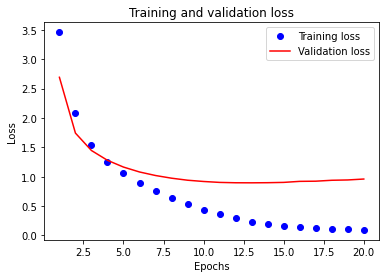

In [ ]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# r는 "빨간 실선"입니다
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

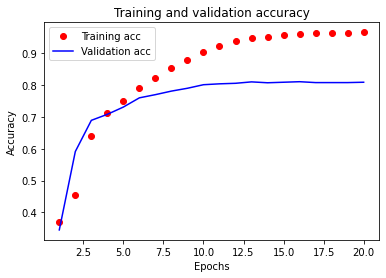

In [ ]:
plt.clf()   # 그림을 초기화합니다
# "ro"는 "빨간색 점"입니다
plt.plot(epochs, acc, 'ro', label='Training acc')
# b는 "파란 실선"입니다
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
# test 데이터를 이용한 결과 평가

results = model.evaluate(tfidfv_test_arr, one_hot_test_labels, verbose=2)

71/71 - 0s - loss: 0.9616 - accuracy: 0.8019 - 272ms/epoch - 4ms/step


# 회고

1. 이번 프로젝트에서 어려웠던 점
 
 (1) 딥러닝 모델을 사용할 때 tfidf로 변환했던 데이터는 학습이 진행되지 않았습니다. 해결하기위해 toarray를 사용하여 numpy.ndarray 형태로 변환하여 학습을 시켰습니다.

 (2) rnn 모델에서 accuracy, f1-score를 한번에 metrics로 지정하고 싶었지만 오류가 발생하여 사용할 수가 없었다. 검색을 통하여 방법을 찾아서 수정하여 2가지 평가지표를 사용하였다.

2. 프로젝트를 진행하면서 알게된 부분 또는 아직 이해하지 못한 부분

(1) 평가지표에서 ['accuracy','f1_score']는 작동하지 않았는가?

- keras 2.0부터 f1_score, precision, recall이 제외되었다. 그래서 단순하게 sklearn으로 불러서 평가지표로 사용할 수 없다. 총 2가지 방법을 사용하여 모델을 compile하기로 결정하였다. 

[방법1]
- precision, recall, f1_score를 함수로 제작하고 평가지표에 삽입하여 출력할 수 있다.

[방법2]
- tensorflow_addons를 import하여 metric = tfa.metrics.F1Score을 작성하여 출력할 수 있다.







참조

(1) [keras f1_score 함수 사용 방법 1](https://datascience.stackexchange.com/questions/45165/how-to-get-accuracy-f1-precision-and-recall-for-a-keras-model)

(2) [keras f1_score 함수 사용 방법 2](https://www.tensorflow.org/addons/api_docs/python/tfa/metrics/F1Score)

